# Counsellor Week Year

In [101]:
# Render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
plt.figure()
plt.rcParams['figure.figsize'] = (15, 10)
df = pd.read_csv('counsellor_week_year.csv', encoding="utf-8-sig")
df.columns

Index(['LastName', 'Week', 'Year', 'Inq', 'Sub', 'Com', 'Adm', 'Dep', 'Pre',
       'Pay', 'Act'],
      dtype='object')

## What does it look like?

In [102]:
df.sample(5)

,LastName,Week,Year,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
190,BrownH,35,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,Johnston,7,2014,27,7,NaN,NaN,NaN,NaN,NaN,NaN
535,GregoryS,16,2017,20,11,6,5,NaN,NaN,NaN,NaN
1384,GregoryGBC,33,2016,2,NaN,NaN,NaN,2,NaN,NaN,NaN
1277,Driedger,30,2016,3,4,3,4,4,4,NaN,NaN


In [103]:
df.describe()

,Week,Year,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
count,3588.000000,3588.000000,2756.000000,2387.000000,2101.000000,2023.000000,1262.000000,722.000000,389.000000,388.000000
mean,26.500000,2015.521739,16.792816,4.635107,3.446930,3.344043,2.453249,3.919668,6.542416,6.440722
std,15.010423,1.124443,54.007114,5.346313,3.379161,3.253131,2.440203,6.459448,7.900892,7.775539
min,1.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.750000,2015.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,26.500000,2016.000000,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
75%,39.250000,2017.000000,11.000000,6.000000,4.000000,4.000000,3.000000,4.000000,8.000000,8.000000
max,52.000000,2017.000000,744.000000,65.000000,38.000000,38.000000,23.000000,64.000000,50.000000,50.000000


## Get historical data < 2017

In [104]:
historical = df.loc[df['Year'] < 2017]
historical.describe()

,Week,Year,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
count,2652.000000,2652.000000,2028.000000,1766.000000,1543.000000,1490.000000,948.000000,553.000000,309.000000,309.000000
mean,26.500000,2015.000000,15.385108,4.615515,3.397926,3.252349,2.412447,3.766727,6.080906,5.987055
std,15.011161,0.816651,50.867677,5.202850,3.302484,3.111442,2.408129,6.064704,7.676701,7.556271
min,1.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.750000,2014.000000,2.000000,1.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,26.500000,2015.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
75%,39.250000,2016.000000,10.000000,6.000000,4.000000,4.000000,3.000000,4.000000,7.000000,7.000000
max,52.000000,2016.000000,724.000000,65.000000,27.000000,26.000000,23.000000,64.000000,50.000000,50.000000


## Get historical means

In [105]:
year_week = historical.groupby(['Year', 'Week'])

# Get sum for each week.
hist_total = year_week.agg('sum')

# Get mean and remove year.
hist_mean = hist_total.reset_index(level=[0,1]).groupby('Week').mean()
hist_mean = hist_mean.drop('Year', 1)
hist_mean = hist_mean.reset_index(level=[0])
hist_mean.sample(5)

,Week,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
15,16,142.000000,76.333333,54.333333,52.000000,6.000000,NaN,NaN,NaN
40,41,39.333333,17.666667,9.666667,13.000000,6.666667,5.333333,4,4
6,7,329.666667,58.333333,13.333333,14.000000,1.000000,NaN,NaN,NaN
14,15,103.666667,91.333333,26.333333,21.666667,2.000000,NaN,NaN,NaN
20,21,134.333333,84.000000,77.666667,68.000000,9.333333,NaN,NaN,NaN


## Remove Inq and make "goal"

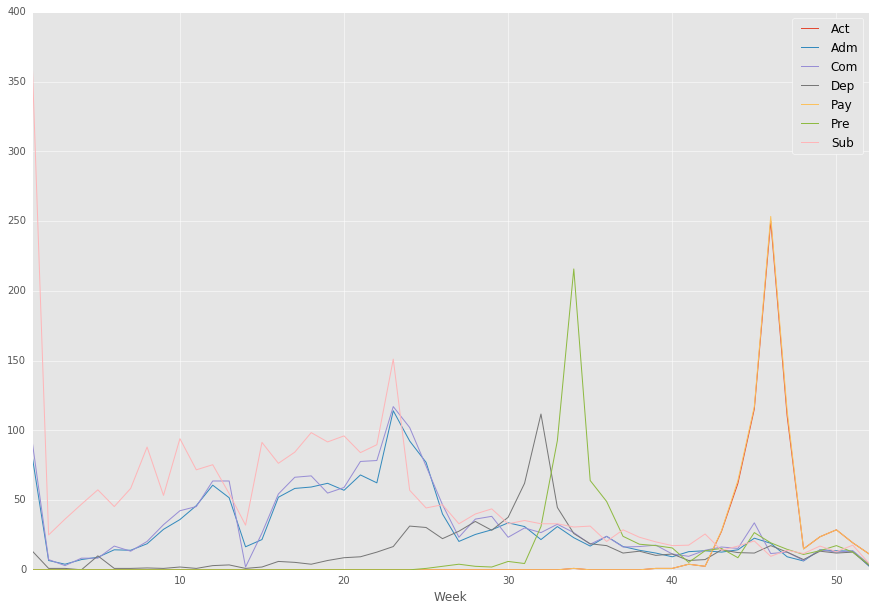

In [116]:
goal = hist_mean.drop('Inq', 1).pivot_table(index='Week').fillna(0)
goal.plot()

## Get 2017 data

In [118]:
yr2017 = df.loc[df['Year'] == 2017]
yr2017.describe()

,Week,Year,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
count,936.000000,936,728.000000,621.000000,558.000000,533.000000,314.000000,169.000000,80.000000,79.000000
mean,26.500000,2017,20.714286,4.690821,3.582437,3.600375,2.576433,4.420118,8.325000,8.215190
std,15.016355,0,61.788771,5.738753,3.582249,3.610730,2.534532,7.608412,8.531068,8.396689
min,1.000000,2017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.750000,2017,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,26.500000,2017,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000
75%,39.250000,2017,13.000000,6.000000,4.000000,5.000000,3.000000,3.000000,10.250000,10.500000
max,52.000000,2017,744.000000,61.000000,38.000000,38.000000,21.000000,49.000000,37.000000,36.000000


## Get 2017 means

In [120]:
year_week2017 = yr2017.groupby(['Year', 'Week'])

# Get sum for each week.
yr2017_total = year_week2017.agg('sum')

# Get mean and remove year.
yr2017_mean = yr2017_total.reset_index(level=[0,1]).groupby('Week').mean()
yr2017_mean = yr2017_mean.drop('Year', 1)
yr2017_mean = yr2017_mean.reset_index(level=[0])
yr2017_mean.sample(5)

,Week,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
30,31,328,45,35,29,70,NaN,NaN,NaN
26,27,236,70,56,65,56,NaN,NaN,NaN
10,11,295,45,44,33,1,NaN,NaN,NaN
2,3,121,44,21,12,1,NaN,NaN,NaN
25,26,238,51,46,33,35,NaN,NaN,NaN


## Remove Inq

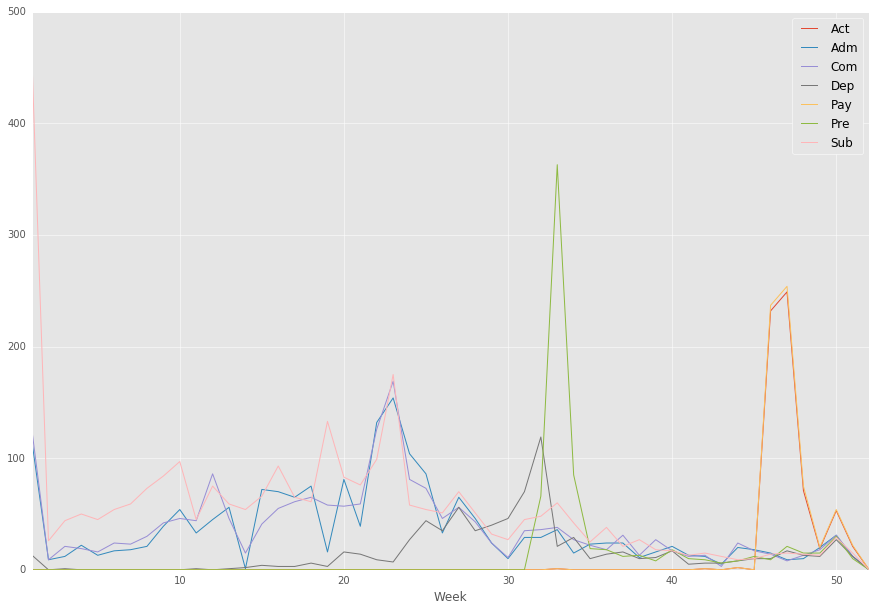

In [122]:
actual = yr2017_mean.drop('Inq', 1).pivot_table(index='Week').fillna(0)
actual.plot()

## Get variance = actual - goal

In [138]:
x = goal.reset_index(level=[0]).set_index('Week')
y = actual.reset_index(level=[0]).set_index('Week')
variance = y - x

In [139]:
variance[:5]

,Act,Adm,Com,Dep,Pay,Pre,Sub
Week,,,,,,,
1,0,32.666667,32.000000,-0.5,0,0,89.666667
2,0,2.333333,1.666667,-1.0,0,0,1.000000
3,0,8.000000,18.000000,0.0,0,0,7.666667
4,0,14.666667,10.666667,0.0,0,0,3.000000
5,0,4.000000,7.666667,-10.0,0,0,-12.333333


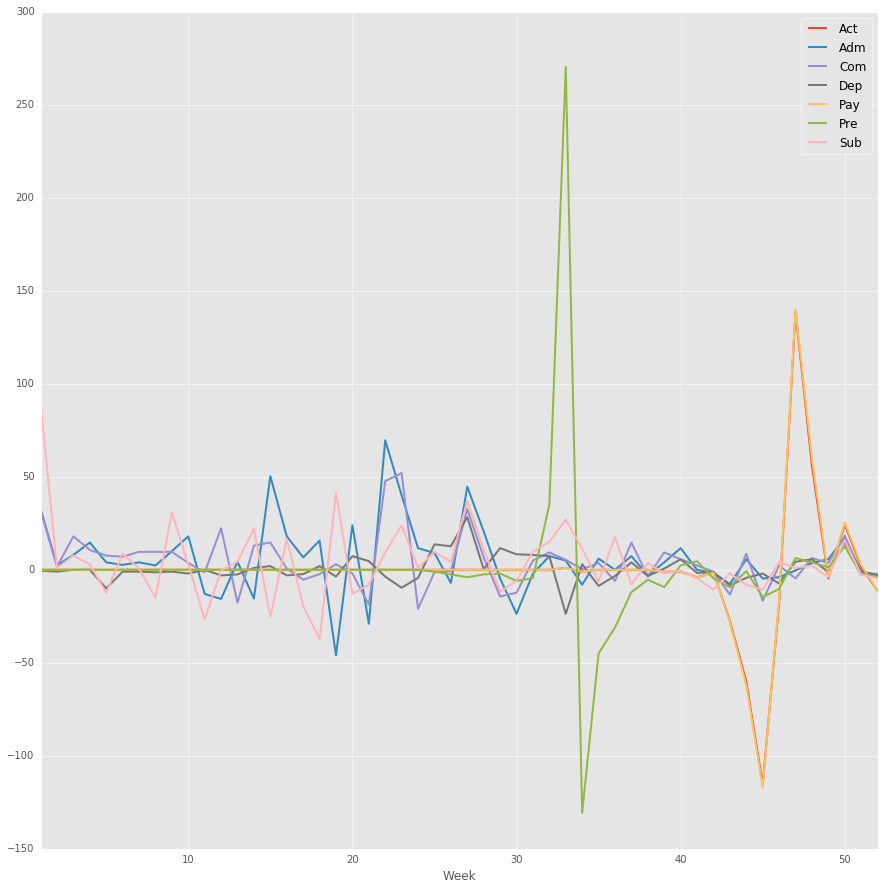

In [144]:
variance.plot(linewidth=2)